In [1]:
import os
import yaml
import math
import fitz
import copy
import json
import tqdm
import pickle
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [7]:
with open("config.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
        print(json.dumps(config, indent=4))
    except yaml.YAMLError as exc:
        print(exc)

{
    "size": {
        "width": [
            600,
            1200
        ],
        "ratio": [
            0.7,
            1.5
        ],
        "max_height": 3000
    },
    "languages": [
        "Ch",
        "En"
    ],
    "title": {
        "method": "figure",
        "method_text": {
            "Ch_path": "/mnt/hwfile/opendatalab/kanghengrui/data/source/text/Chinese/title",
            "En_path": "/mnt/hwfile/opendatalab/kanghengrui/data/source/text/English/title",
            "fontsize": [
                18,
                36
            ]
        },
        "method_figure": {
            "path": "/mnt/petrelfs/zhaozhiyuan/layout/pretrain_layout/material/title",
            "ratio_step": 0.2,
            "area_step": 500
        }
    },
    "maintext": {
        "fontsize": [
            10,
            12
        ],
        "Ch_path": "/mnt/hwfile/opendatalab/kanghengrui/data/source/text/Chinese/maintext",
        "En_path": "/mnt/hwfile/opendatalab/kanghengrui/data/

### table

In [17]:
TABLE_PATH = config['table']['path']
TABLE_RATIO_STEP = config['table']['ratio_step']
TABLE_AREA_STEP = config['table']['area_step']

In [18]:
ratio_range = np.arange(0, 20, TABLE_RATIO_STEP)
area_range = np.arange(0, 300000, TABLE_AREA_STEP)
table_search_dict = {}
for r in ratio_range:
    table_search_dict[r] = {}
    for area in area_range:
        table_search_dict[r][area] = []

In [19]:
from utils.get_image_size import get_image_size
ratio_all, area_all = [], []
for f in os.listdir(TABLE_PATH):
    size = get_image_size(os.path.join(TABLE_PATH, f))
    ratio = size[0]/size[1] # w/h
    area = size[0]*size[1]
    ratio_all.append(ratio)
    area_all.append(area)
    min_ratio = min(ratio_range, key=lambda x:abs(x-ratio))
    min_area = min(area_range, key=lambda x:abs(x-area))
    table_search_dict[min_ratio][min_area].append(f)

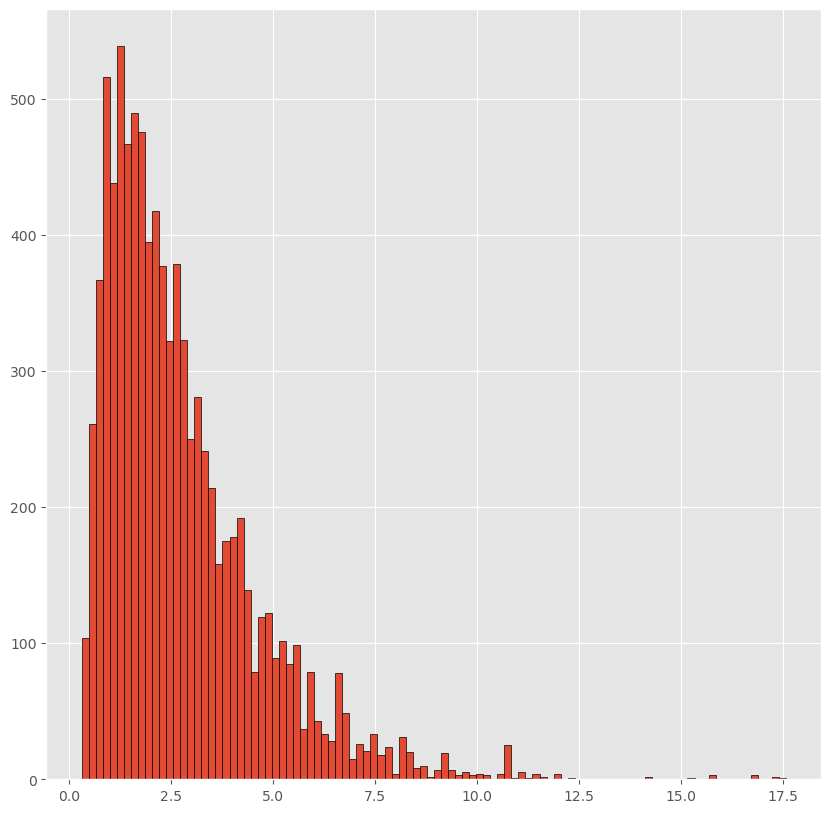

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.hist(ratio_all, bins=ratio_range.shape[0], edgecolor='black')
plt.show()

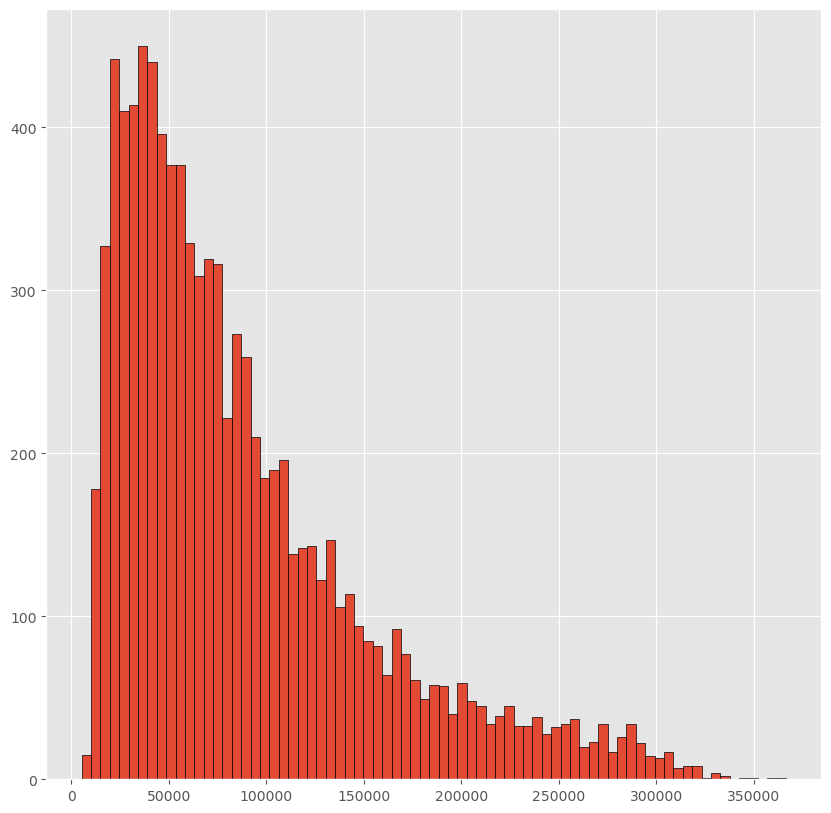

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.hist(area_all, bins=area_range.shape[0], edgecolor='black')
plt.show()

In [22]:
with open("table_material_map.pt", "wb") as f:
    pickle.dump(table_search_dict, f)

### pdf_table

In [8]:
TABLE_PATH = config['table']['path']
TABLE_RATIO_STEP = config['table']['ratio_step']
TABLE_AREA_STEP = config['table']['area_step']

In [9]:
ratio_range = np.arange(0, 20, TABLE_RATIO_STEP)
area_range = np.arange(0, 300000, TABLE_AREA_STEP)
table_search_dict = {}
for r in ratio_range:
    table_search_dict[r] = {}
    for area in area_range:
        table_search_dict[r][area] = []

In [10]:
from utils.get_image_size import get_image_size
ratio_all, area_all = [], []
for f in tqdm.tqdm(os.listdir(TABLE_PATH)):
    size = get_image_size(os.path.join(TABLE_PATH, f))
    ratio = size[0]/size[1] # w/h
    area = size[0]*size[1]
    ratio_all.append(ratio)
    area_all.append(area)
    min_ratio = min(ratio_range, key=lambda x:abs(x-ratio))
    min_area = min(area_range, key=lambda x:abs(x-area))
    table_search_dict[min_ratio][min_area].append(f)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 686021/686021 [36:10<00:00, 316.01it/s]


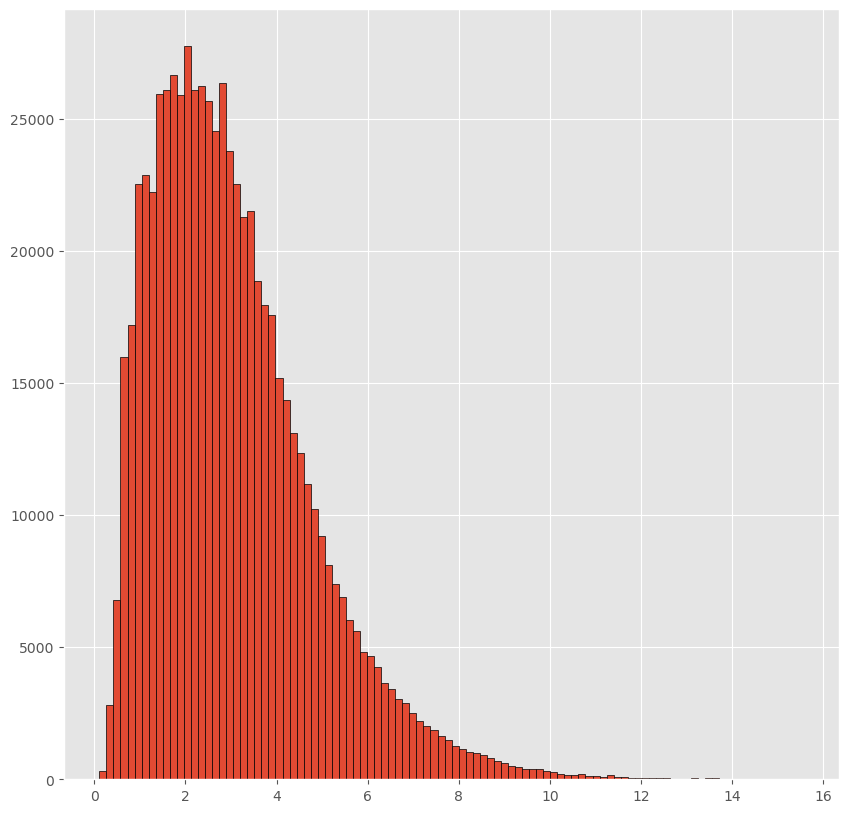

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.hist(ratio_all, bins=ratio_range.shape[0], edgecolor='black')
plt.show()

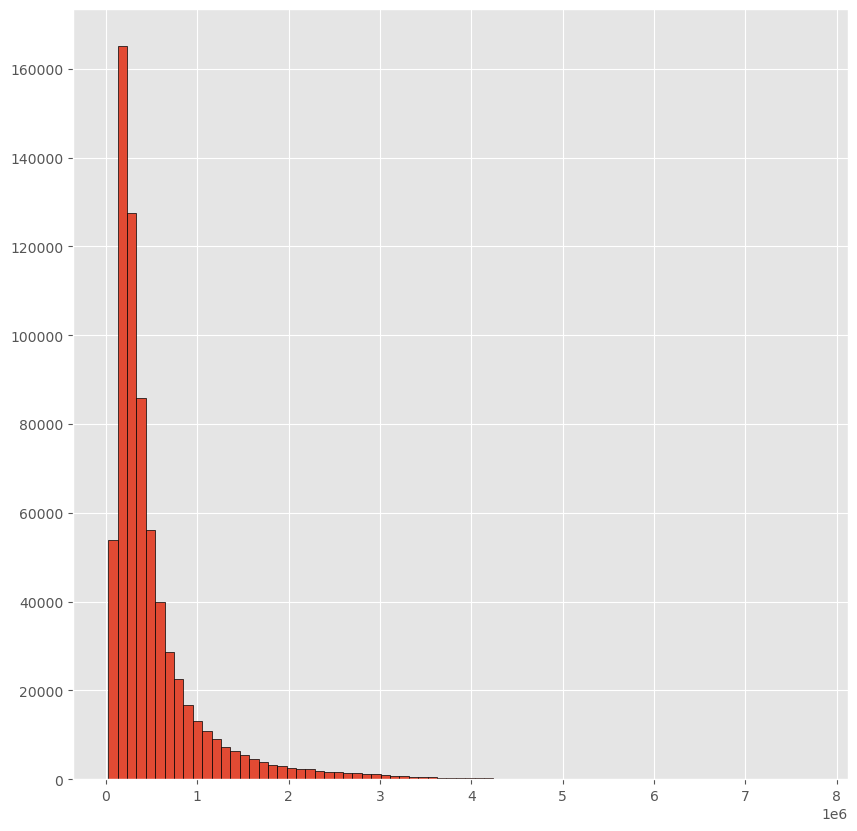

In [12]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.hist(area_all, bins=area_range.shape[0], edgecolor='black')
plt.show()

In [13]:
with open("pdftable_material_map.pt", "wb") as f:
    pickle.dump(table_search_dict, f)

### title

In [25]:
TITLE_PATH = config['title']['method_figure']['path']
TITLE_RATIO_STEP = config['title']['method_figure']['ratio_step']
TITLE_AREA_STEP = config['title']['method_figure']['area_step']

In [28]:
ratio_range = np.arange(0, 30, TITLE_RATIO_STEP)
area_range = np.arange(0, 50000, TITLE_AREA_STEP)
title_search_dict = {}
for r in ratio_range:
    title_search_dict[r] = {}
    for area in area_range:
        title_search_dict[r][area] = []

In [30]:
from utils.get_image_size import get_image_size
ratio_all, area_all = [], []
for f in tqdm.tqdm(os.listdir(TITLE_PATH)):
    size = get_image_size(os.path.join(TITLE_PATH, f))
    ratio = size[0]/size[1] # w/h
    area = size[0]*size[1]
    ratio_all.append(ratio)
    area_all.append(area)
    min_ratio = min(ratio_range, key=lambda x:abs(x-ratio))
    min_area = min(area_range, key=lambda x:abs(x-area))
    title_search_dict[min_ratio][min_area].append(f)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 645926/645926 [12:25<00:00, 866.58it/s]


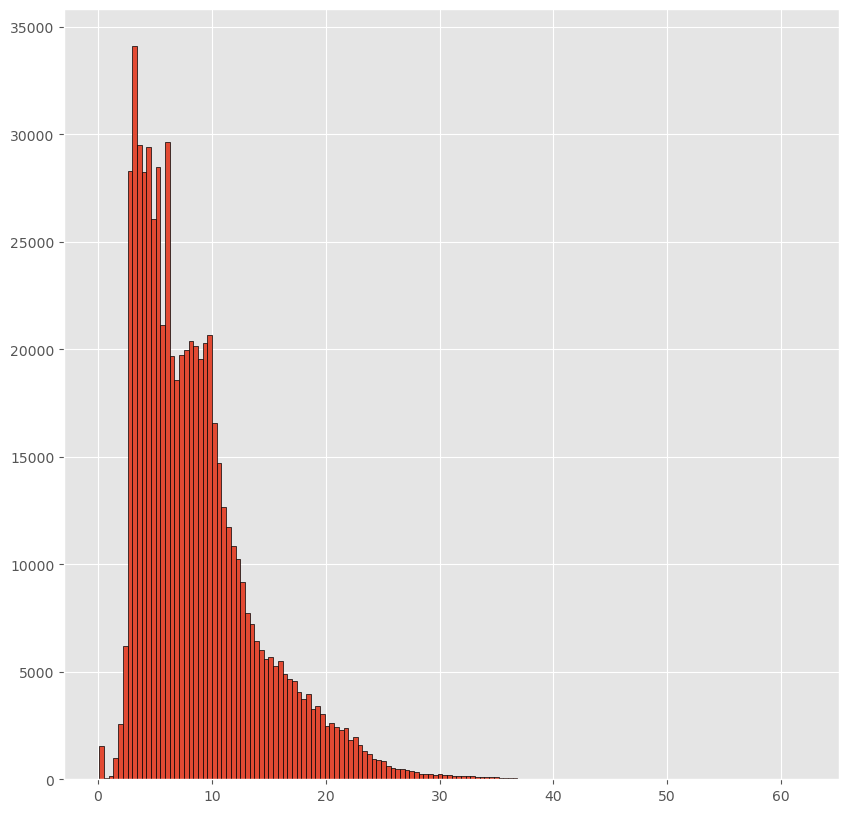

In [31]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.hist(ratio_all, bins=ratio_range.shape[0], edgecolor='black')
plt.show()

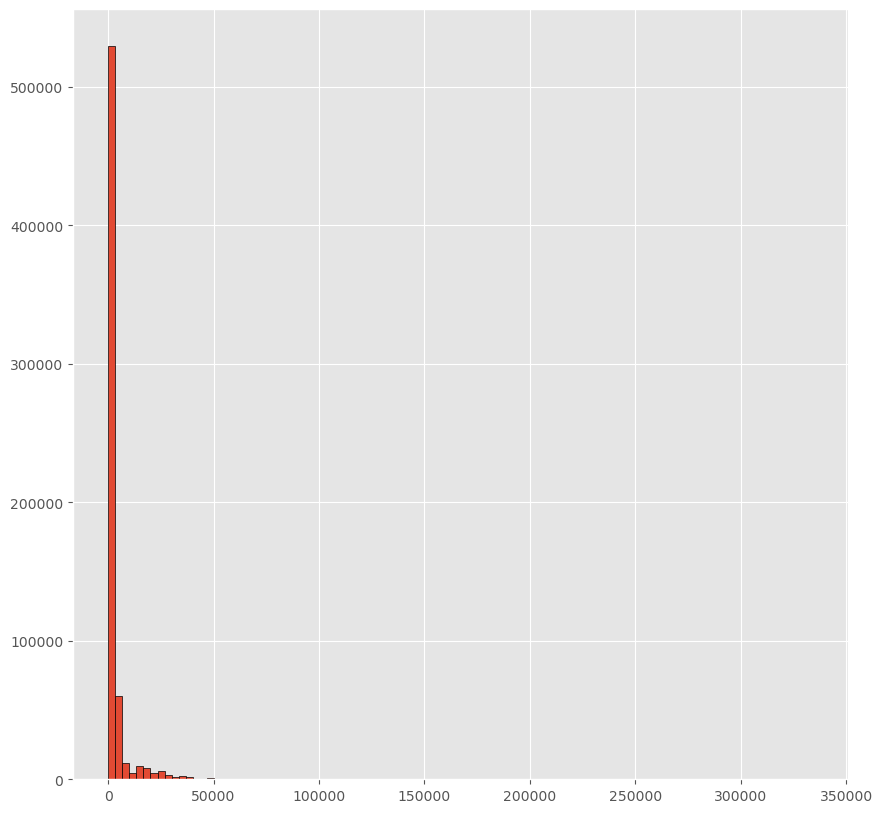

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
plt.hist(area_all, bins=area_range.shape[0], edgecolor='black')
plt.show()

In [33]:
with open("title_material_map.pt", "wb") as f:
    pickle.dump(title_search_dict, f)